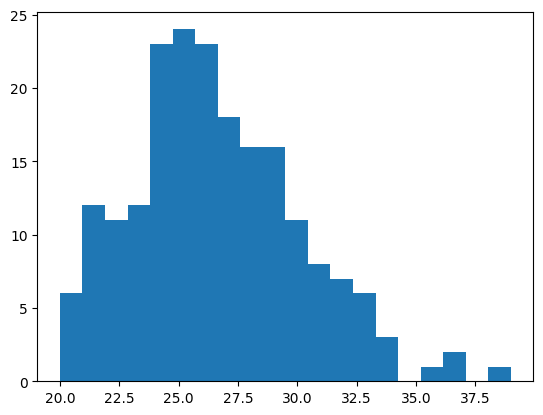

26.445


In [48]:
import numpy
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
# Define a node for the Huffman tree
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

def build_huffman_tree(freq_dict):
    nodes = [Node(char, freq) for char, freq in freq_dict.items()]
    nodes_copy = nodes

    while len(nodes) > 1:
        nodes.sort(key=lambda node: node.freq)
        left = nodes.pop(0)
        right = nodes.pop(0)
        merged = Node(left.char + right.char, left.freq + right.freq)
        merged.left = left
        merged.right = right
        nodes.append(merged)
    return nodes[0]

def huffman_dict(tree, prefix='', codes=None, freq = None):
    if codes is None:
        codes = {}
    if freq is None:
        freq = {}
    if not tree.left and not tree.right:
        codes[tree.char] = prefix
        freq[tree.char] = tree.freq
    if tree.left:
        codes[tree.left.char] = prefix+"0"
        build_huffman_codes(tree.left, prefix + '0', codes, freq)
    if tree.right:
        codes[tree.right.char] = prefix+"1"
        build_huffman_codes(tree.right, prefix + '1', codes, freq)
        freq[tree.char] = tree.left.freq + tree.right.freq

    return codes, freq

def huffman_enc(seq, codes):
    outbit = ""
    for sym in seq:
        outbit += codes[sym]
    return outbit

def huffman_dec(bits, codes):
    outseq = []
    current = ""
    for bit in bits:
        current += bit
        for sym in codes:
            if len(sym) == 1:
                if current == codes[sym]:
                    current = ""
                    outseq.append(sym)
    return outseq

symbols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
prob = [0.2, 0.05, 0.005, 0.2, 0.3, 0.05, 0.045, 0.15]
seq = ['c', 'd', 'a', 'g']

freq_dict = {symbol: probability for symbol, probability in zip(symbols, prob)}
huffman_tree = build_huffman_tree(freq_dict)
huffman_codes, huffman_freq = huffman_dict(huffman_tree)
bits = huffman_enc(seq, huffman_codes)
# print(bits)
seq = huffman_dec(bits, huffman_codes)
# print(seq)

length_b = []
total_len = 0
R = 200
for i in range(R):
    seq = []
    for i in range(10):
        x = numpy.random.choice(symbols, p=prob)
        seq+=x
#     print(seq)
    bits = huffman_enc(seq, huffman_codes)
    length_b.append(len(bits))
    total_len += len(bits)
plt.hist(length_b, 20)
plt.show()
print(total_len/10)

# # Display the Huffman codes
# for symbol in huffman_codes:
#     print(f"Symbol: {symbol}, Huffman Code: {huffman_codes[symbol]}, freq: {huffman_freq[symbol]}")

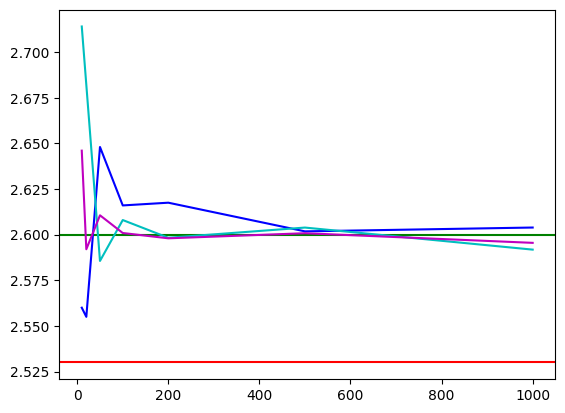

In [55]:
xl = [10, 20, 50, 100, 200, 500, 1000]
hx = 2.53
l_bar = 2.6
y1 = []
y2 = []
y3 = []
n = 10
for R in [10, 20, 50, 100, 200, 500, 1000]:
    total_len = 0
    for i in range(R):
        seq = []
        for i in range(n):
            x = numpy.random.choice(symbols, p=prob)
            seq+=x
    #     print(seq)
        bits = huffman_enc(seq, huffman_codes)
        length_b.append(len(bits))
        total_len += len(bits)
    y1.append(total_len/(R*n))
n = 50
for R in [10, 20, 50, 100, 200, 500, 1000]:
    total_len = 0
    for i in range(R):
        seq = []
        for i in range(n):
            x = numpy.random.choice(symbols, p=prob)
            seq+=x
    #     print(seq)
        bits = huffman_enc(seq, huffman_codes)
        length_b.append(len(bits))
        total_len += len(bits)
    y2.append(total_len/(R*n))
n = 100
for R in [10, 20, 50, 100, 200, 500, 1000]:
    total_len = 0
    for i in range(R):
        seq = []
        for i in range(n):
            x = numpy.random.choice(symbols, p=prob)
            seq+=x
    #     print(seq)
        bits = huffman_enc(seq, huffman_codes)
        length_b.append(len(bits))
        total_len += len(bits)
    y3.append(total_len/(R*n))

plt.axhline(y = hx, color = 'r', linestyle = '-')
plt.axhline(y = l_bar, color = 'g', linestyle = '-')
plt.plot(xl, y1, color = 'b')
plt.plot(xl, y2, color = 'c')
plt.plot(xl, y3, color = 'm')
plt.show()